# Eland Elastic{ON} Demo
    
👋 Welcome to the Elastic{ON} Demo of Eland!

The Elasticsearch cluster being used for this demo is [hosted on Elastic Cloud](https://cloud.elastic.co)
and this Jupyter Notebook is [hosted by Binder](https://mybinder.org). The Elasticsearch cluster is configured to be read-only. 

## Resources

- [Eland Documentation (eland.readthedocs.io)](https://eland.readthedocs.io)
- [Eland Source Code](https://github.com/elastic/eland)
- Dataset: [NYC OpenData Restaurant Inspection Results](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j)
- [Eland Demo Source Code](https://github.com/sethmlarson/eland-binder-demo)

## Installing

Eland is available on [PyPI](https://pypi.org/project/eland) and [Conda Forge](https://anaconda.org/conda-forge/eland):

- `$ python -m pip install eland`

- `$ conda install -c conda-forge eland`

## Getting Started

This Jupyter Notebook works like any other, you can simply browse the already completed results or you can try things out yourself by modifying a code block and hitting "Run". The Elasticsearch cluster in Elastic Cloud will respond with new results.

If you're unfamiliar with Jupyter Notebooks there's a [quickstart guide available](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import eland as ed
from elasticsearch import Elasticsearch

### Creating a Connection to Elasticsearch

Our Elasticsearch instance is running in Elastic Cloud
and uses an API Key configured to be read only with
access to the `nyc-restaurants` index.

Below we construct an [`eland.DataFrame`](https://eland.readthedocs.io/en/latest/reference/dataframe.html) instance that uses
that index.

In [2]:
es = Elasticsearch(
  cloud_id="eland-binder:dXMtZWFzdDEuZ2NwLmVsYXN0aWMtY2xvdWQuY29tJDZlMDllNWE4NzU4NzQxMjliMDEzZDdhMmYwMmNiNWNhJDVlYTYwMjM0OThlOTRmMzBiNGZiOTZmYWY2MWJiMjU5",
  api_key=("M8xPjnQBvi72UTXObMKb", "ARmi0-MKRb-cW75rGhv8YA")
)

Now that we're connected to Elasticsearch we can look at the mapping for the index `nyc-restaurants`:

In [3]:
print(json.dumps(es.indices.get_mapping("nyc-restaurants"), indent=2))

{
  "nyc-restaurants": {
    "mappings": {
      "properties": {
        "action": {
          "type": "keyword"
        },
        "boro": {
          "type": "keyword"
        },
        "building": {
          "type": "keyword"
        },
        "census_tract": {
          "type": "long"
        },
        "community_board": {
          "type": "long"
        },
        "council_district": {
          "type": "long"
        },
        "critical_flag": {
          "type": "boolean"
        },
        "cuisine_description": {
          "type": "text"
        },
        "grade": {
          "type": "keyword"
        },
        "grade_date": {
          "type": "date"
        },
        "inspection_date": {
          "type": "date"
        },
        "inspection_type": {
          "type": "keyword"
        },
        "location": {
          "type": "geo_point"
        },
        "name": {
          "type": "text"
        },
        "phone": {
          "type": "keyword"
        },
    

Now we can create an `eland.DataFrame()` from the index:

In [4]:
df = ed.DataFrame(
  es, es_index_pattern="nyc-restaurants",
)

## Exploring the Dataset

You can explore a DataFrame in Eland the same way you would a Pandas DataFrame. Let's see what the columns and datatypes look like:

In [5]:
df.info()

<class 'eland.dataframe.DataFrame'>
Index: 193778 entries, hckkjnQBvi72UTXObqpX to z8wljnQBvi72UTXOr5xn
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   action                 193778 non-null  object        
 1   boro                   193778 non-null  object        
 2   building               193778 non-null  object        
 3   census_tract           193778 non-null  int64         
 4   community_board        193778 non-null  int64         
 5   council_district       193778 non-null  int64         
 6   critical_flag          193778 non-null  bool          
 7   cuisine_description    193778 non-null  object        
 8   grade                  193778 non-null  object        
 9   grade_date             193778 non-null  datetime64[ns]
 10  inspection_date        193778 non-null  datetime64[ns]
 11  inspection_type        193778 non-null  object        
 12  location          

In [6]:
df.describe()

,census_tract,community_board,council_district,score,zipcode
count,193778.000000,193778.000000,193778.000000,193778.000000,193778.000000
mean,28844.255478,248.836473,20.039303,12.897687,10678.202237
std,30716.499340,130.722183,15.806437,8.152593,595.238075
min,100.000000,101.000000,1.000000,-1.000000,10000.000000
25%,7897.567134,105.000000,4.000000,9.000000,10022.000000
50%,16036.441659,301.000000,19.460180,12.000000,10468.204563
75%,40299.484602,401.000000,34.000000,13.000000,11228.759380
max,162100.000000,503.000000,51.000000,99.000000,12345.000000


In [7]:
df.dtypes

action                           object
boro                             object
building                         object
census_tract                      int64
community_board                   int64
council_district                  int64
critical_flag                      bool
cuisine_description              object
grade                            object
grade_date               datetime64[ns]
inspection_date          datetime64[ns]
inspection_type                  object
location                         object
name                             object
phone                            object
record_date              datetime64[ns]
score                           float64
street                           object
violation_code                   object
violation_description            object
zipcode                           int64
dtype: object

### Retrieving Data from Elasticsearch

Here we ask for the first 5 entries via the `head()` method. From this display we can see how the resulting data frame looks like, very similar to a Pandas data frame!

In [8]:
df.head(5)

,action,boro,building,census_tract,community_board,council_district,critical_flag,cuisine_description,grade,grade_date,...,inspection_type,location,name,phone,record_date,score,street,violation_code,violation_description,zipcode
hckkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,252,32900,309,40,False,Jewish/Kosher,A,2020-01-29,...,Cycle Inspection / Initial Inspection,"[-73.953415555946, 40.663740745425]",GRUIT,3478460622,2020-09-14,7.0,EMPIRE BOULEVARD,10F,Non-food contact surface improperly constructe...,11225
hskkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,394,51600,210,13,False,Italian,A,2018-07-31,...,Cycle Inspection / Initial Inspection,"[-73.78734583163201, 40.849516303236]",ARTIE'S,7188859885,2020-09-14,6.0,CITY ISLAND AVENUE,10F,Non-food contact surface improperly constructe...,10464
h8kkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Manhattan,1158,5800,105,2,True,Japanese,A,2018-11-19,...,Cycle Inspection / Re-inspection,"[-73.98851294715101, 40.744481575862004]",CHIKARASHI,9172620623,2020-09-14,12.0,BROADWAY,04L,Evidence of mice or live mice present in facil...,10001
iMkkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,3218,14100,203,17,True,Chinese,A,2017-05-22,...,Cycle Inspection / Re-inspection,"[-73.909117939035, 40.823335867465]",NEW PANDA RESTAURANT,7182928628,2020-09-14,11.0,3 AVENUE,02B,Hot food item not held at or above 140º F.,10451
ickkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,1875,83000,317,45,False,Sandwiches,A,2019-02-25,...,Cycle Inspection / Initial Inspection,"[-73.948380677069, 40.639773910201995]",SUBWAY,6464841708,2020-09-14,4.0,NOSTRAND AVENUE,10B,Plumbing not properly installed or maintained;...,11226


### Filtering Rows in a Data Frame

You can apply filters to our data frame in the same way that you can with Pandas. Here we're filtering for rows which are in the 'Staten Island' borough, with a 'True' `critical_flag`, and a `grade` that's either 'C' or 'N'.
Then we filter the data frame to only include the columns `name`, `boro`, `critical_flag`, and `grade`:

In [9]:
df[
  (df.boro == "Staten Island")
  & (df.critical_flag == True)
  & df.grade.isin(("C", "N"))
].filter(
  ["name", "boro", "critical_flag", "grade"]
).head(5)

,name,boro,critical_flag,grade
BMkkjnQBvi72UTXObqxX,EAST PACIFIC,Staten Island,True,C
ickkjnQBvi72UTXOcrUH,BOOTLEG MANNINGS,Staten Island,True,C
xckkjnQBvi72UTXOhuew,AMENDMENT 18 (entrance on Dock Street),Staten Island,True,C
WckkjnQBvi72UTXOh-pc,PRECIOUS ISLAND TEA SHOP,Staten Island,True,C
G8kkjnQBvi72UTXOeMjB,LIBERTY TAVERN,Staten Island,True,C


### Progressive Filtering

Take note how the output of the DataFrame below changes progressively as filters are applied in the same way that they would for Pandas.

Watch as the number of rows changes as we apply the filters.

In [10]:
df1 = df.filter(["name", "boro", "grade"])
df1

,name,boro,grade
hckkjnQBvi72UTXObqpX,GRUIT,Brooklyn,A
hskkjnQBvi72UTXObqpX,ARTIE'S,Bronx,A
h8kkjnQBvi72UTXObqpX,CHIKARASHI,Manhattan,A
iMkkjnQBvi72UTXObqpX,NEW PANDA RESTAURANT,Bronx,A
ickkjnQBvi72UTXObqpX,SUBWAY,Brooklyn,A
...,...,...,...
y8wljnQBvi72UTXOr5xn,EL POLLO PERUANO,Queens,A
z8wljnQBvi72UTXOr5xn,LA ESPIGA RESTAURANT AND BAKERY,Queens,A
zMwljnQBvi72UTXOr5xn,PAPA JOHN'S PIZZA,Queens,A
zcwljnQBvi72UTXOr5xn,EL MALECON RESTAURANT,Queens,A


In [11]:
df2 = df1[df1.boro == "Brooklyn"]
df2

,name,boro,grade
hckkjnQBvi72UTXObqpX,GRUIT,Brooklyn,A
ickkjnQBvi72UTXObqpX,SUBWAY,Brooklyn,A
i8kkjnQBvi72UTXObqpX,CLOCK FACE COFFEE,Brooklyn,A
mMkkjnQBvi72UTXObqpX,ANGRY WADES,Brooklyn,A
oskkjnQBvi72UTXObqpX,CATCH 22,Brooklyn,A
...,...,...,...
uMwljnQBvi72UTXOr5xn,GRIMALDI'S,Brooklyn,A
uswljnQBvi72UTXOr5xn,KNAPP ST PIZZA II,Brooklyn,B
xMwljnQBvi72UTXOr5xn,HOT BAGELS,Brooklyn,A
yMwljnQBvi72UTXOr5xn,TONY'S PIZZA II,Brooklyn,A


In [12]:
df3 = df2[~df2.grade.isin(("A", "B", "C"))]
df3

,name,boro,grade
tMkkjnQBvi72UTXObqtX,SOLDIERS CARIBBEAN BUFFET RESTAURANT,Brooklyn,P
P8kkjnQBvi72UTXOb60U,ALTA CALIDAD,Brooklyn,P
U8kkjnQBvi72UTXOb60V,90 DEGREE COFFEE SHOP,Brooklyn,P
bskkjnQBvi72UTXOb60V,CARIBBEAN & AMERICAN ENTERTAINMENT BAR LOUNGE...,Brooklyn,P
gskkjnQBvi72UTXOb663,CHARACTERS KTV,Brooklyn,P
...,...,...,...
48wljnQBvi72UTXOrpcP,MIDNIGHTS,Brooklyn,Z
8cwljnQBvi72UTXOr5tn,KFC,Brooklyn,P
aMwljnQBvi72UTXOrpvM,BAMBOO EXPRESS RESTAURANT & BAKERY,Brooklyn,Z
gMwljnQBvi72UTXOrpvM,JOE'S PIZZA OF PARK SLOPE,Brooklyn,P


### Aggregations

Eland supports many Pandas aggregations including min, mean, median, max, var, std, count, nunique, sum, and mad.

Aggregations are mapped to Elasticsearch aggs and then unpacked into a Pandas DataFrame or Series.

In [13]:
df[["score", "census_tract", "critical_flag", "grade_date"]].agg(["min", "mean", "median", "max", "var", "std"])

,score,census_tract,critical_flag,grade_date
min,-1.000000,1.000000e+02,False,2014-04-21 00:00:00.000000000
mean,12.897687,2.884426e+04,0.505584,2018-09-19 15:25:13.620741211
median,12.000000,1.605200e+04,True,2018-10-25 03:23:23.130271484
max,99.000000,1.621000e+05,True,2020-03-16 00:00:00.000000000
var,66.464938,9.435058e+08,0.249969,NaT
std,8.152635,3.071666e+04,0.499971,NaT


In [14]:
df.grade.value_counts()

A    154761
B     25408
C      9586
P      2388
Z      1622
N         7
G         6
Name: grade, dtype: int64

### Visualizations via Matplotlib

You can create simple histograms of your data:

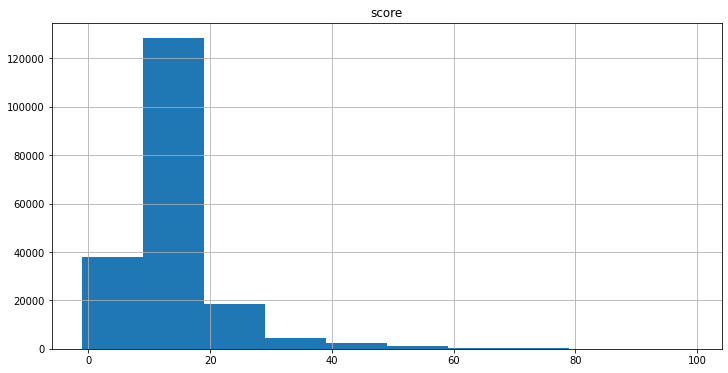

In [15]:
df[["score"]].hist(figsize=(12, 6))
plt.show()

## Machine Learning

Since this is a read-only cluster you can't upload your own models
however I can show you how an existing model on the cluster was
trained.

More information on [Machine Learning in Eland](https://eland.readthedocs.io/en/latest/reference/ml.html)

### Import Scikit-Learn and Train Model Locally

```python
>>> from sklearn import datasets
>>> from sklearn.tree import DecisionTreeClassifier

>>> digits = datasets.load_wine()
>>> print("Feature Names:", digits.feature_names)
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

>>> print("Data example:", digits.data[0])
Data example: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]

# Save 10, 80, and 140 for testing our model
>>> data = [x for i, x in enumerate(digits.data) if i not in (10, 80, 140)]
>>> target = [x for i, x in enumerate(digits.target) if i not in (10, 80, 140)]

# Fit the other data to a DecisionTreeClassifier
>>> sk_classifier = DecisionTreeClassifier()
>>> sk_classifier.fit(data, target)
```

### Test the Locally Trained Model

```python
>>> print(sk_classifier.predict(digits.data[[10, 80, 140]]))
[0 1 2]

>>> print(digits.target[[10, 80, 140]])
[0 1 2]
```

### Serialize the Scikit-Learn Model into Elasticsearch

```python
>>> from eland.ml import MLModel

>>> es_classifier = MLModel.import_model(
...     es_client=es,
...     model_id="wine-classifier",
...     model=sk_classifier,
...     feature_names=digits.feature_names,
...     es_if_exists="replace"
>>> )
```

### Run the Model in Elasticsearch!

```python
>>> print(es_classifier.predict(digits.data[[10, 80, 140]]))
[0 1 2]

# Tada!
```